In [1]:
import pandas as pd
import configparser
import matplotlib.pyplot as plt
%matplotlib inline

from Wrapper import *
from Influx_Dataframe_Client import Influx_Dataframe_Client

# Data Sources

## XBOS

In [2]:
xbos_obj = Import_XBOS()
xbos_obj.get_weather_power_tstat('ciee', '2018-08-01T00:00:00Z', '2018-08-30T00:00:00Z', 
                                        data_type=['power', 'temperature'])
imported_data = xbos_obj.data
imported_data.head()

,d3489cfa-93a5-37e7-a274-0f35cf17b782,c05385e5-a947-37a3-902e-f6ea45a43fe8,c7e33fa6-f683-36e9-b97a-7f096e4b57d4,03099008-5224-3b61-b07e-eee445e64620,b47ba370-bceb-39cf-9552-d1225d910039
2018-07-31 17:00:00-07:00,960.0,78.587500,78.0,79.0000,74.400000
2018-07-31 17:15:00-07:00,1000.0,78.775000,78.0,79.0000,74.400000
2018-07-31 17:30:00-07:00,880.0,78.500000,78.0,79.0000,74.432258
2018-07-31 17:45:00-07:00,960.0,78.358025,78.0,79.0000,74.500000
2018-07-31 18:00:00-07:00,840.0,78.225000,78.0,78.6875,74.500000


/anaconda3/envs/mortar/lib/python3.6/site-packages/sklearn/linear_model/base.py:485: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


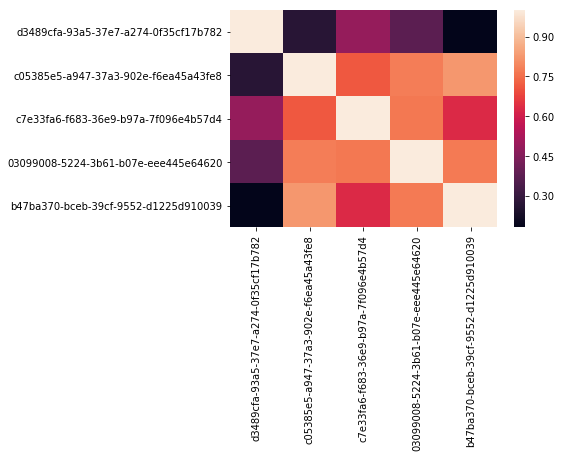

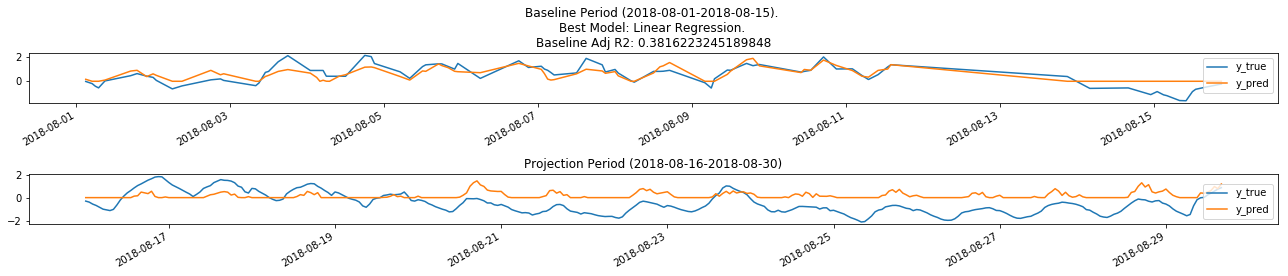

In [3]:
main_obj = Wrapper()

cleaned_data = main_obj.clean_data(imported_data, high_bound=9998,
                                rename_col=['1', '2', '3', '4', '5'],
                                drop_col='1',
                                save_file=False)

preprocessed_data = main_obj.preprocess_data(cleaned_data, week=True, tod=True, 
                                            standardize=True,
                                            save_file=False)

main_obj.model(preprocessed_data, dep_col='5', alphas=np.logspace(-4,1,5), figsize=(18,5),
                cv=5,
                baseline_period=["2018-08-01","2018-08-15"], 
                projection_period=["2018-08-16","2018-08-30"])

main_obj.write_json()

## CSV

In [4]:
# main_obj = Wrapper()
# main_obj.read_json(file_name='input.json')
# main_obj.search(file_name='input.json')

In [5]:
# def func(X, y):
#     from sklearn.linear_model import LinearRegression
#     from sklearn.model_selection import cross_val_score
#     model = LinearRegression()
#     model.fit(X, y)
#     return model.predict(X)

# main_obj = Wrapper()

# imported_data = main_obj.import_data(folder_name='../data/', head_row=[5,5,0], 
#                                      save_file=False)

# cleaned_data = main_obj.clean_data(imported_data, high_bound=9998,
#                                 rename_col=['OAT','RelHum_Avg', 'CHW_Elec', 'Elec', 'Gas', 'HW_Heat'],
#                                 drop_col='Elec',
#                                 save_file=False)

# preprocessed_data = main_obj.preprocess_data(cleaned_data, week=True, tod=True, 
#                                             normalize=True,
#                                             save_file=False)

# main_obj.model(preprocessed_data, dep_col='HW_Heat', alphas=np.logspace(-4,1,5), figsize=(18,5),
#                 cv=5,
#                 baseline_period=["2014-01","2014-12"], 
#                 projection_period=["2015-01","2015-12", "2016-01","2016-12"],
# #                project_ind_col=['OAT'],
#                 exclude_time_period=["2014-06", "2014-07"],
#                 custom_model_func=func)

# main_obj.write_json()

## InfluxDB

In [6]:
# database = 'pyTestDB' # Change this in config file!
# measurement = 'SkySpark_Power'
# tags_list = ['Building_Number']
# values_list = ['30_1']
# client = Influx_Dataframe_Client('./influx_config.yaml')

# query1 = client.specific_query(database, measurement, tags=tags_list, values=values_list,
#                                 start_time='2017-08-01 00:00:00', end_time='2018-07-31 00:00:00')
# query2 = client.specific_query(database, measurement='Outdoor_Air_Temperature',
#                                 start_time='2017-08-01 00:00:00', end_time='2018-07-31 00:00:00')

In [7]:
# df = query1.copy()
# df = df.join(query2, how='outer')
# df.plot()

In [8]:
# main_obj = Wrapper()

# cleaned_data = main_obj.clean_data(df, rename_col=['Power', 'OAT'])

# preprocessed_data = main_obj.preprocess_data(cleaned_data, col_degree=['OAT'], degree=[2], 
#                                               month=True, week=True)

# main_obj.model(preprocessed_data, dep_col='Power', baseline_period=["2017-08", "2018-04"],
#                projection_period=["2018-05", "2018-07"],
#                alphas=np.logspace(-4,1,5))
# main_obj.write_json()